<img src="./unal.png" align=left width="150" height="150"></img>



$\,$
---

<h2 align="center">DIAGNÓSTICO DEL CÁNCER DE MAMA EN EL ESTADO DE WISCONSIN</h2>
<h3 align="center">ANÁLISIS MULTIVARIADO</h3>

$\;$

Se desarrolla la descripción de tipo multivariado para el conjunto de datos pertenecientes al diagnóstico del cáncer de mama en el estado de Wisconsin proporcionados por el **it Repositorio de aprendizaje automático de la UCI**, en miras a realizar un análisis con soporte a los diversos métodos estadísticos desarrollados en la teoría que al ser usados junto con el software Estadístico R permitirán concluir en base a las distintas representaciones gráficas y resultados obtenidos.

#### Biopsia por aspiración con aguja fina

El conjunto de datos relativos al diagnóstico del cáncer de mama en el estado de Wisconsin fueron recopilados a partir de las diversas características medidas en una imagen digitalizada de un aspirado con aguja fina (FNA) en masas mamarias, procedimiento que describe características de los núcleos celulares presentes en la imagen. Tal proceso de medición en núcleos celulares es proporcionado por Cruz & Martinez de Larios (2002) quienes además de considerarlo importante destacan su uso desde a mediados del siglo pasado, procedimiento que viene destacándose para detectar lesiones de tipo clínico, sin embargo su uso a lo largo del tiempo se ha generalizado para la evaluación de anormalidades mastográficas, conllevando a la detección del cáncer.


El conjunto de datos está conformado por 569 observaciones medidas a 33 variables, para realizar el presente análisis se tomarán las tres primeras las cuales son de tipo numérico.


    %\item radio (media de las distancias del centro a los puntos en el perímetro) 

*  $X_{1}:$ **Compactness (compacidad)**: Variable medida en ($\frac{P^2}{A}- 1)$, donde P es el perímetro y A el area de la masa estudiada.
*  $X_{2}:$ **Smoothness (suavidad)**: La cual hace referencia a la variación local en longitudes de radio. 
*  $X_{3}:$ **Simetría**
*  **Diagnosis**: Hace referencia al diagnostico generado y posee dos valores M: Maligno y B: Benigno.

In [9]:
library(readr)

In [10]:
setwd("C:\\Users\\YULY\\Desktop\\Desktop\\UNAL 2018\\analisis multivariado\\TALLER1FINAL")
databiopsia<-read.csv("data.csv",sep = ",")

In [11]:
#organizando los datos 
A<-databiopsia[,c("diagnosis","compactness_mean","smoothness_mean","symmetry_mean","area_mean")]
databiopsia <- data.frame(A)
colnames(databiopsia)<-c("diagnosis", "compactness", "smoothness","symmetry", "area")
head(databiopsia, n=10)

diagnosis,compactness,smoothness,symmetry,area
M,0.27760,0.11840,0.2419,1001.0
M,0.07864,0.08474,0.1812,1326.0
M,0.15990,0.10960,0.2069,1203.0
M,0.28390,0.14250,0.2597,386.1
M,0.13280,0.10030,0.1809,1297.0
M,0.17000,0.12780,0.2087,477.1
M,0.10900,0.09463,0.1794,1040.0
M,0.16450,0.11890,0.2196,577.9
M,0.19320,0.12730,0.2350,519.8
M,0.23960,0.11860,0.2030,475.9


Como etapa inicial, para un análisis descriptivo de los datos se la matriz de varianzas y correlaciones para de esta manera poder caracterizar el conjunto de datos.

$${\bf \overline{X}}'=\begin{bmatrix}
\overline{X}_1\;\;,& \overline{X}_2 \;\;,& \overline{X}_3
\end{bmatrix}\;\;\;=\begin{bmatrix}
0.10434 \;\;,& 0.09636 \;\;,& 0.18116
\end{bmatrix}
$$

$$
{\bf S}=\begin{bmatrix}
0.002784 & 0.000488 & 0.000870\\ 
0.000488 & 0.000197 & 0.000214 \\ 
0.000870 & 0.000214 & 0.000750
\end{bmatrix} \;\;\;\;\; {\bf R}=\begin{bmatrix}
1 & 0.659 & 0.602 \\ 
0.659 & 1 & 0.577 \\ 
0.602 & 0.577 & 1
\end{bmatrix}
$$

Observando la matriz de correlaciones, se puede observar que son todas positivas, indicando la existencia de una asociación lineal esto puede ser observado en la orientación de los puntos en el eje coordenado como es el caso de el scatter plot siguiente el cual caracteriza  a las variables  $X_{1}:$compacidad y  $X_{2}:$suavidad  el hecho de $r_{12}$ ser positiva indica que conjuntamente los valores aumentan para valores mayores y disminuyen para menores.

In [12]:
#------------------------------------------
# vector de medias
#-----------------------------------------
a<-as.matrix(databiopsia[,2:4])
n<-dim(a)[1]
p<-dim(a)[2]
aa<-colMeans(a);aa


compactness  smoothness    symmetry 
 0.10434098  0.09636028  0.18116186

In [13]:
#------------------------------------------
# Matriz de varianzas y covarianzas
#-----------------------------------------
a<-as.matrix(databiopsia[,2:4])
n<-dim(a)[1]
p<-dim(a)[2]
aa<-colMeans(a)
d<-diag(1,n,n) 
u<-matrix(rep(1,n*n),ncol = n)
c<-1/n
mono<-a-c*(u%*%a)
s<-c*(t(mono)%*%mono)  ;s    #matriz var y cov

di<-diag(1/sqrt(diag(s)),dim(s)[1],dim(s)[1])    #s_j es la raiz cuadrada de la varianza 
r<-di%*%(s%*%di);r      #matriz correlacion

,compactness,smoothness,symmetry
compactness,0.0027842855,0.0004887135,0.0008709846
smoothness,0.0004887135,0.0001974521,0.0002146766
symmetry,0.0008709846,0.0002146766,0.0007502220


1.0000000,0.6591232,0.6026410
0.6591232,1.0000000,0.5577748
0.6026410,0.5577748,1.0000000


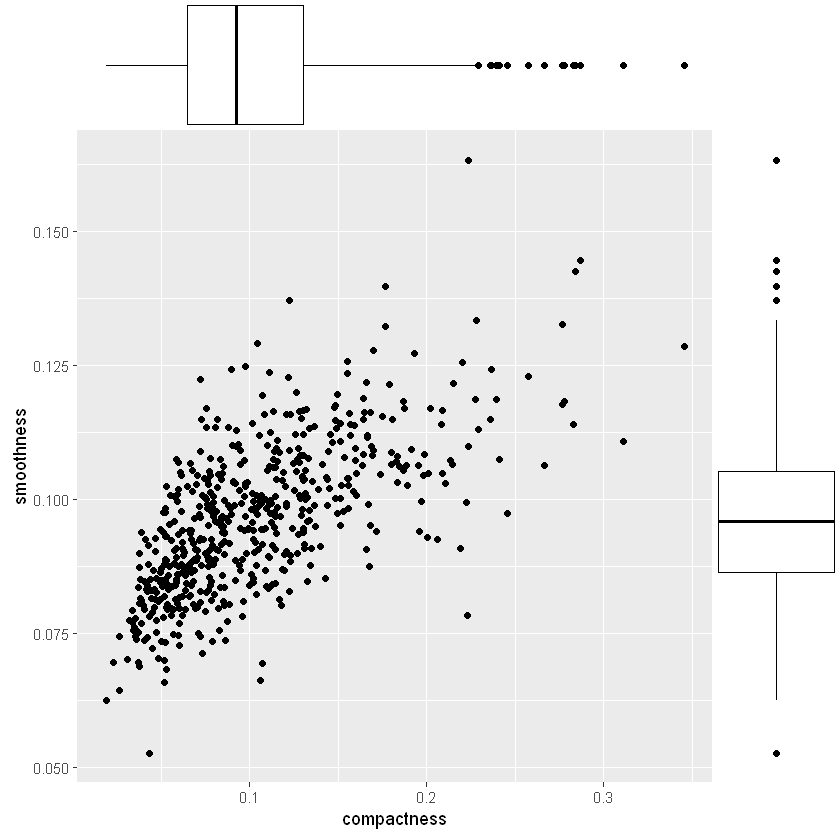

In [14]:
require(ggplot2)
library(ggExtra)
library(cowplot)
#par(mfrow=c(2,2))

# classic plot :
p=ggplot(databiopsia, aes(x=compactness, y=smoothness)) +
  geom_point() +
  theme(legend.position="none") 
ggMarginal(p, type="boxplot")


Observando la matriz de correlaciones, se puede observar que son todas positivas, indicando la existencia de una asociación lineal esto puede ser observado en la orientación de los puntos en el eje coordenado como es el caso de el scatter plot anterior el cual caracteriza  a las variables  $X_{1}:$compacidad y  $X_{2}:$suavidad  el hecho de $r_{12}$ ser positiva indica que conjuntamente los valores aumentan para valores mayores y disminuyen para menores.

En lo que corresponde al boxplot para la variable Compacidad, se puede observar que el $50\%$ de la información está entre $1Q=0.06492$ y $3Q=0.13040$, no obstante en el caso univariado los valores mayores a $Q3 + 1.5 RI= 0.22862$ son considerados outliers para Compacidad. Así mismo, en lo que corresponde a la variable Suavidad se puede observar que el $50\%$ de la información está entre $1Q=.08637$ y $3Q=.10530$, no obstante los valores mayores a $Q3 + 1.5 RI=0.133695$  y menores que $Q1 - 1.5 RI=0.057975$ son considerados outliers para la variable Suavidad.

---

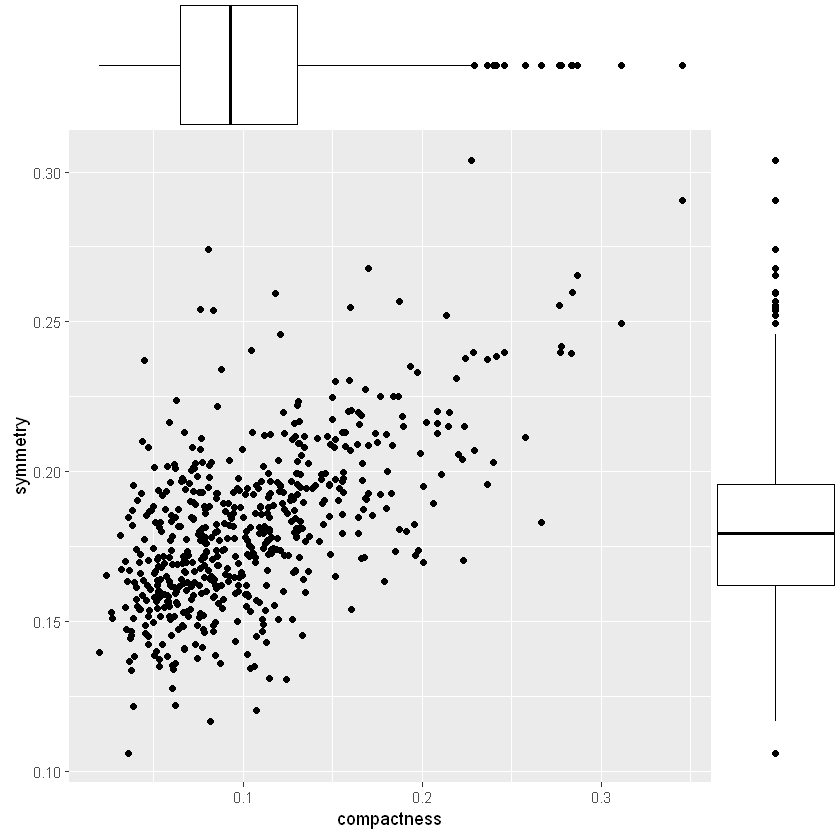

In [15]:
#-----

{q=ggplot(databiopsia, aes(x=compactness, y=symmetry)) +
  geom_point() +
  theme(legend.position="none")
ggMarginal(q, type="boxplot")}


En el scatter plot anterior se observa una relación entre las variables $X_{1}:$Compacidad y $X_{3}:$ Simetría de tipo lineal el cual es observado en la correlación $r_{13}$ positiva, indicando  tendencia a valores grandes de compacidad con valores grandes de simetría conjuntamente y valores pequeños de suavidad con pequeños en simetría.


---

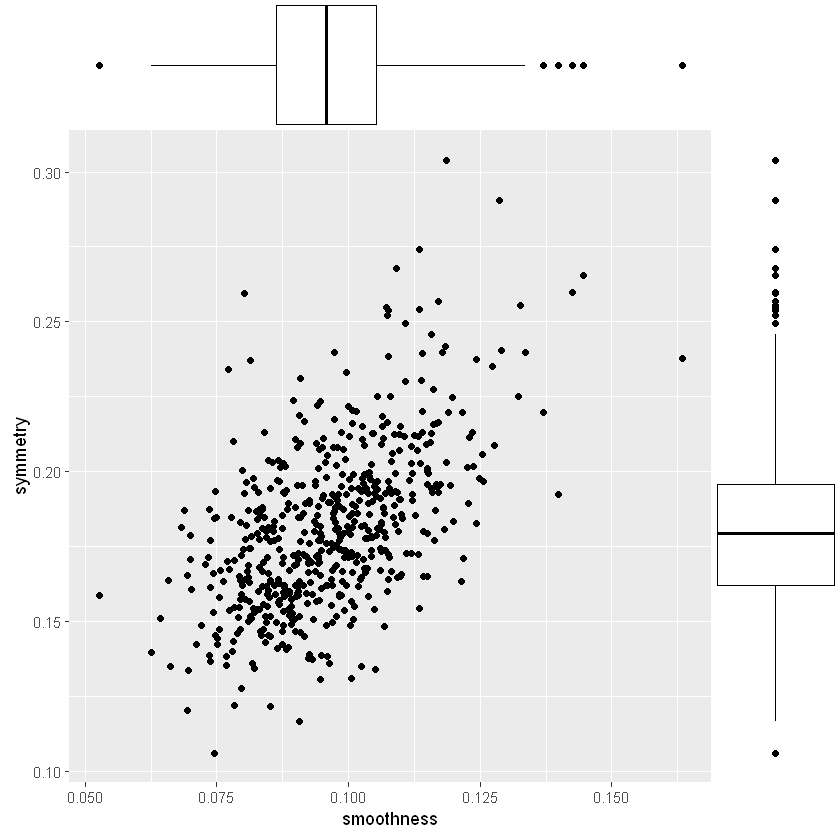

In [16]:
#-----

{r=ggplot(databiopsia, aes(x=smoothness, y=symmetry)) +
  geom_point() +
  theme(legend.position="none")
ggMarginal(r, type="boxplot")}

#plot_grid(p, q, labels = "AUTO")

La existencia de una asociación lineal puede ser observado en la orientación de los puntos en el eje coordenado como es el caso de el scatter plot anterior el cual está caracterizado por las variables  $X_{s}:$ Suavidad y  $X_{2}:$ Simetría,  el hecho de $r_{23}$ ser positivo indica que conjuntamente los valores aumentan para valores mayores y disminuyen para menores.

En lo que corresponde al boxplot para la variable Simetría, se puede observar que el $50\%$ de la información está entre $1Q=0.1619 $ y $3Q=0.1957$, así mismo, para valores mayores a $Q3 + 1.5 RI= 0.2464$ y menores que $Q1 - 1.5 RI=0.1112$ son considerados outliers para la variable Simetría.

---


Según Johnson y  Wichern  (2002) Las cantidades $s_{ik}$  y  $r_{ik}$ no transmiten, en general, todo lo que hay que saber sobre la asociación entre dos variables. Pueden existir asociaciones no lineales que no sean reveladas por estas estadísticas descriptivas. Covarianza y correlación proporcionan medidas de asociación lineal, o asociación a lo largo de una línea (p.9). Para establecer relaciones entre los datos multivariados se realizaran métodos no paramétricos asociados al concepto de profundidad.\\

No obstante el usar los métodos no paramétricos para el conjunto de datos tiene sus grandes ventajas, puesto que no se considerará si las distribuciones marginales son normales, como es el caso actual el cual se determina que las distribuciones marginales no son normales. Observese las distribuciones por variable las cuales son asimétricas.

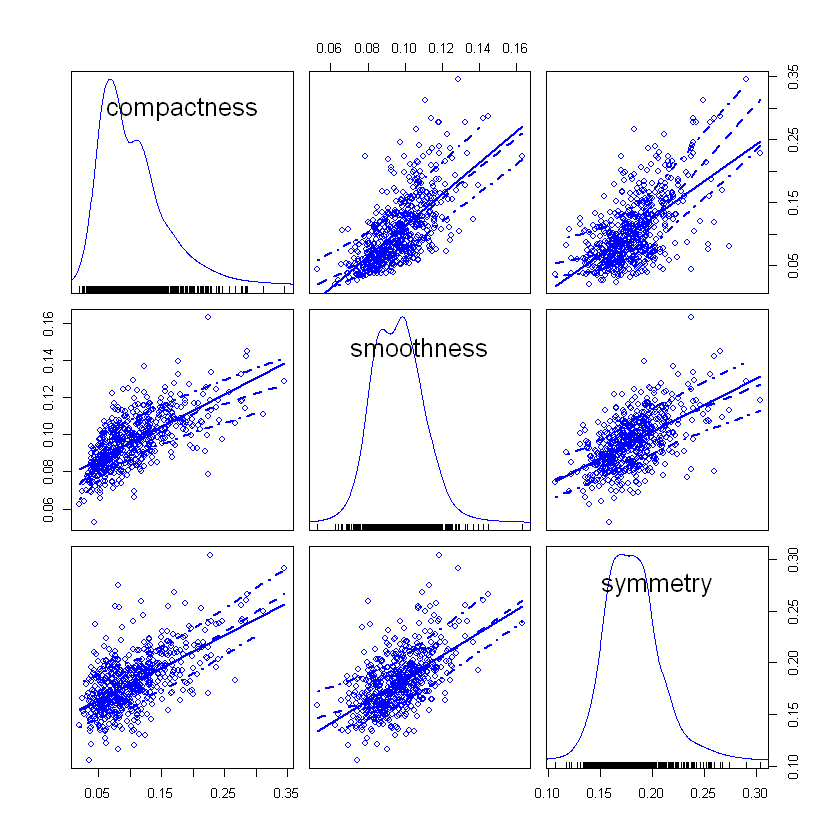

In [17]:
require(car)
scatterplotMatrix(databiopsia[,2:4])

En la matriz de barplots proporcionados anteriormente, se logra identificar la forma de la distribución por variables,lográndose observar que las distribuciones son sesgadas como es el caso de la variable Compacticidad y simetría se encuentras sesgadas a derecha, lo cual indica que al parecer no provienen de distribuciones normales. Vease los resultados de las pruebas Shapiro-Wilk para cada una de las variables:

|  Test | Variable| Statistic | p value | Normality |
| --- | :-: | :-: | --- | :-: |
| Shapiro-Wilk |  compactness | 0.9170 | $<$0.001 |   NO |
| Shapiro-Wilk |  smoothness |  0.9875 |  1e-04 |   NO |
| Shapiro-Wilk |  symmetry |  0.9726 |  $<$0.001 |   NO |

Para determinar si en realidad no son normales se procede a realizar los respectivos QQplot lo cuales se presentan en la siguiente figura, donde se puede identificar que para todas las variables (Compacticidad, Suavidad y Simetría) los datos no se encuentran alrededor de la línea recta, lo cual da indicios de no cumplimiento del supuesto de normalidad, hechos que confirman los resultados de las pruebas de Shapiro-Wilk que contrastan la hipótesis:


$$ H_{0}: F_n(w)= N(\mu_0, \sigma_0^2) \hspace{0.9cm} vs \hspace{0.9cm} H_{1}: F_n(w) \neq N(\mu_0, \sigma_0^2) $$

**NOTA:** Hay evidencia estadistica para rechazar $H_0$ por lo cual se afirma el hecho de que las distribuciones no son normales. 

[1]  79 259

[1] 505 123

[1] 26 79

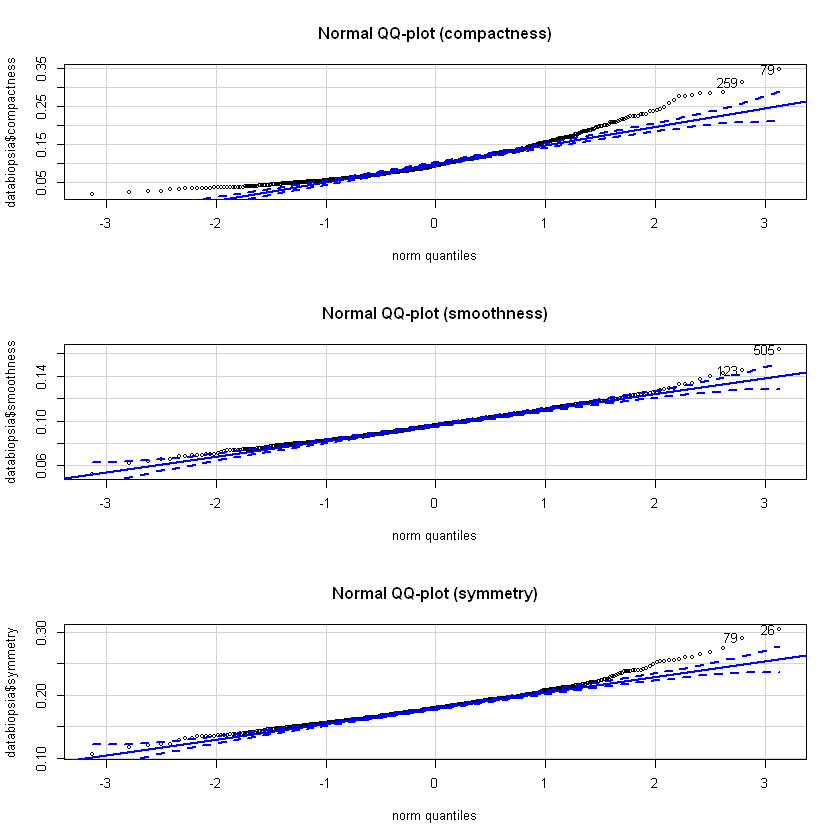

In [18]:
library("car")
par(mfrow=c(3,1))
qqPlot(databiopsia$compactness , main='Normal QQ-plot (compactness)')
qqPlot(databiopsia$smoothness, main='Normal QQ-plot (smoothness)')
qqPlot(databiopsia$symmetry, main='Normal QQ-plot (symmetry)')

### Chi-square plot

Para determinar si la distribución de los datos es normal multivariada (Normal 3-variada) se calcula la fracción de los puntos dentro de un contorno, para de esta manera compararlo con la probabilidad teórica es un procedimiento útil, Conociendo que:
\begin{equation*}
{({\bf X}- {\bf \mu})}' \sum\nolimits^{-1} ({\bf X}- {\bf \mu}) \leqslant \chi ^{2}_p (\alpha)
\end{equation*}
%Se espera que  el $\alpha \%$, de las observaciones de la muestra se encuentren en la elipse dada por
Remplazando ${\bf \sum\nolimits^{-1}}$ y ${\bf \mu}$ por sus estimaciones ${\bf S^{-1}}$ y ${\bf \overline{X}}$  respectivamente, se calculan las distancias al cuadrado:

\begin{equation*}
d_j^2={({\bf X_j}- {\bf \overline{X}})}' S^{-1} ({\bf X_j}- {\bf \overline{X}})  \;\;\;\;\;\; \;\;\;   con \;\;\; \;\;\;j=1,...569
\end{equation*}

Para generar el Chi-square plot se consideran los pasos descritos por Johnson y  Wichern  (2002) ordenando las distancias al cuadrado de menor a mayor $d_{(1)}^2 \leq  d_{(2)}^2\leq  d_{(3)}^2 , ... , \leq  d_{(n)}^2$ y graficando los pares $\left ( q_3( \frac{j-\frac{1}{2}}{569}), d_{(j)}^2 \right )$ , siendo $q_3( \frac{j-\frac{1}{2}}{569})$ el cuantil de un chi-cuadrado. obteniéndose la siguiente gráfica: 

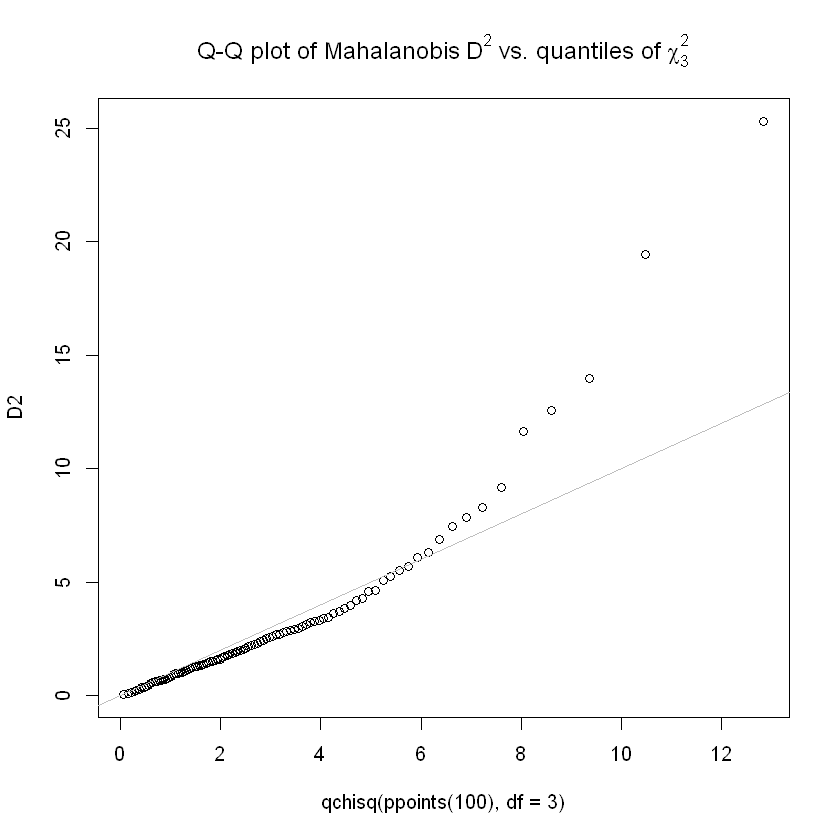

In [21]:
library(xtable)
tabla_S <- xtable(s)
tabla_R<- xtable(r)

require(graphics)

stopifnot(mahalanobis(databiopsia[,2:4], 0, diag(ncol(databiopsia[,2:4]))) == rowSums(databiopsia[,2:4]*databiopsia[,2:4]))
##- Here, D^2 = usual squared Euclidean distances


D2 <- mahalanobis(databiopsia[,2:4], aa, s)
#plot(density(D2, bw = 0.5), main="Squared Mahalanobis distances, n=100, p=3") ; rug(D2)
qqplot(qchisq(ppoints(100), df = 3), D2,
       main = expression("Q-Q plot of Mahalanobis" * ~D^2 *
                           " vs. quantiles of" * ~ chi[3]^2))
abline(0, 1, col = 'gray')

Observándose la gráfica se puede ver que los puntos no se encuentran en la linea recta, las distancias mahalanobis mayores son demasiado grandes en relación a distancias esperadas de las poblaciones normales trivariadas. Por consiguiente los datos provenientes de diagnostico de cáncer de mama en el estado de Wisconsil no provienen de una distribución normal trivariada.

### Outliers


En el caso univariado la detección de datos atípicos se realizó observando los boxplot por variable, sin embargo en el caso bivariado no es tan simple, han de considerarse todas las variables al mismo tiempo, este procedimiento de encontrar las observaciones atípicas puede hacerse por medio del Chi-square plot siendo los candidatos las observaciones con mayor distancia Mahalanobis, no obstante el observar los scatter plot darán algún indicio.

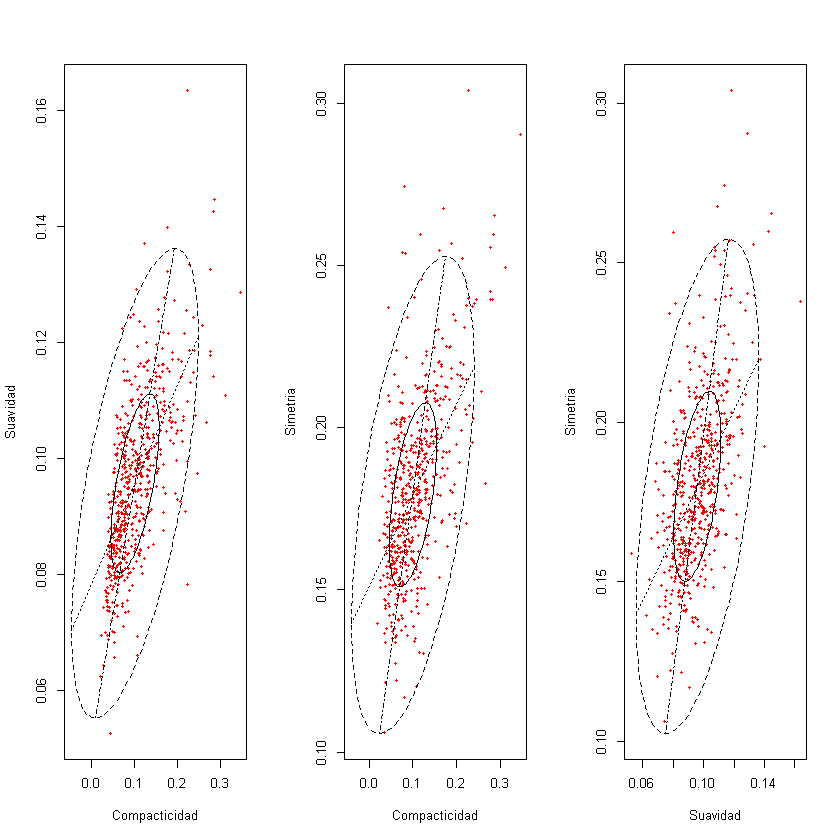

In [30]:
#Boxplot bivariado
library(MVA)
par(mfrow=c(1,3))
bvbox(cbind(databiopsia$compactness,databiopsia$smoothness), xlab = "Compacticidad", ylab = "Suavidad", pch = 19, cex=0.5 , col = "red")
bvbox(cbind(databiopsia$compactness,databiopsia$symmetry), xlab = "Compacticidad", ylab = "Simetria", pch = 19, cex=0.5 , col = "red")
bvbox(cbind(databiopsia$smoothness,databiopsia$symmetry), xlab = "Suavidad", ylab = "Simetria", pch = 19, cex=0.5 , col = "red")

En la anterior figura se muestran situaciones con muchas observaciones inusuales, pese a esto en la esquina superior derecha de los scatter plots se elimina un patrón de tipo elíptico por tales datos. En consecuencia, se procede a detectar las observaciones atípicas considerando los pasos determinados por Johnson y  Wichern  (2002) los cuales establecen estandarizar el conjunto de datos con su respectiva distancia Mahalanobis.

Para determinar las observaciones inusuales, se procede a estandarizar las observaciones y calcular las distancias Estadísticas en una lista para poder contrastarse por un percentil apropiado de la distribución de chi-cuadrado con 3 grados de libertad. En consecuencia se buscan las distancias mayores al estadístico $\chi ^{2}_3 (0.005) = 12.83$. La siguiente tabla revela los resultados llegándose a 17 observaciones outliers multivariantes de los datos provenientes al diagnóstico de cáncer de mama en Wisconsil.

| Obs | $z_1$ | $z_2$ | $z_3$ | $D_2$ |
| :-: | :-: | :-: | :-: | :-: |
|4  |3.402908991  |3.28355348  |2.8673829 |13.95401
|13  |2.680857626 | 0.07399205 | 2.1371943 |13.95411
|26  |2.335940700 | 1.58269942 | 4.4847509 |21.34683
|61 |-0.449737258  |1.21263912 | 3.4004207 |22.01732
|77  |0.006803881 | 2.32993656 | 2.1590999 |13.34109
|79  |4.568424975 | 2.29435384|  3.9955244 |25.31501
|83  |3.073153250 | 0.70736448 | 0.0634584 |15.90001
|113 | 2.254449339 |-1.28028631| -0.3929095| 20.19175
|123  |3.455973134 | 3.44011745 | 3.0791376 |15.08335
|151 |-0.539188241 | 1.21975566 | 2.6592792 |15.56422
|182 | 3.389642956 | 1.26245493 | 2.1298924 |13.38222
|259  |3.924074675 | 1.03472551 | 2.4949867 |20.20673
|289 | 0.260753705| -1.15005355 | 2.8600810| 19.18429
|425 |-0.398189234 | 0.79276301 | 2.6519773| 13.49394
|444 |-1.131801002 |-1.06323171 | 2.0459207 |14.89070
|505 | 2.265820227 | 4.77091122 | 2.0678263 |24.21514
|521 | 0.344140214 | 2.89926009|  1.4070056 |13.07530


In [23]:
#-----------------
# Estandarizando observaciones
#-----------------

x1<-NULL
for(i in 1:569){
  x1[i]<-(databiopsia[i,2]-aa[1])/sqrt(s[1,1])
}

x2<-NULL
for(i in 1:569){
  x2[i]<-(databiopsia[i,3]-aa[2])/sqrt(s[2,2])
}

x3<-NULL
for(i in 1:569){
  x3[i]<-(databiopsia[i,4]-aa[3])/sqrt(s[3,3])
}


estandarizados<-cbind(seq(1,569),x1,x2,x3,D2)

outliers<-subset(estandarizados, D2>12.83); outliers
colnames(outliers)<-c("obs", "z1", "z2","s3", "D2")

,x1,x2,x3,D2
4,3.402908991,3.28355348,2.8673829,13.95401
13,2.680857626,0.07399205,2.1371943,13.95411
26,2.335940700,1.58269942,4.4847509,21.34683
61,-0.449737258,1.21263912,3.4004207,22.01732
77,0.006803881,2.32993656,2.1590999,13.34109
79,4.568424975,2.29435384,3.9955244,25.31501
83,3.073153250,0.70736448,0.0634584,15.90001
113,2.254449339,-1.28028631,-0.3929095,20.19175
123,3.455973134,3.44011745,3.0791376,15.08335
151,-0.539188241,1.21975566,2.6592792,15.56422


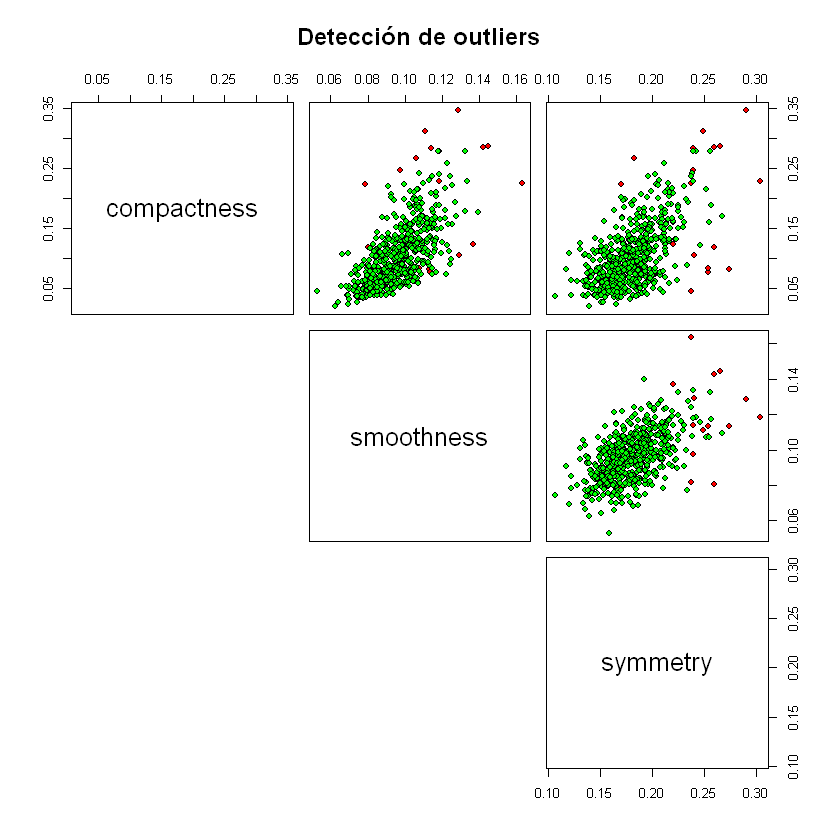

In [24]:
#-----------------
# diferenciando base con y sin outliers para graficar
#-----------------

#los siguientes datos 
basecon<-databiopsia[c(4,13,26,61,77,79,83,113,123,151,182,259,289,425,444,505,521),2:4]
basesin<-databiopsia[-c(4,13,26,61,77,79,83,113,123,151,182,259,289,425,444,505,521),2:4]

baseconoutliers<-cbind(basecon$compactness, basecon$smoothness,basecon$symmetry)
baseconoutliers<-as.data.frame(baseconoutliers)
baselibre<-cbind(basesin$compactness, basesin$smoothness,basesin$symmetry)
baselibre<-as.data.frame(baselibre)

nuevabase<-rbind(baseconoutliers,baselibre)
distincion<-rep(c("OU","NO"),c(17,552))  #crecando columna character
ss<-cbind(distincion,nuevabase)
colnames(ss)<-c("distincion", "compactness", "smoothness","symmetry")


#pairs(ss[,2:4], pch = 20,  cex = 1.2, col = my_cols[ss$distincion], lower.panel=NULL)
pairs(ss[,2:4], main = "Detección de outliers", 
             pch = 21, bg = c("green",  "red")[unclass(ss$distincion)], lower.panel=NULL)


## Algunas caracteristicas de resumen

Anteriormente se logró identificar observaciones del conjunto de datos del cancer de mama que no son usuales a la población estudiada, este tipo de análisis caracteriza éstas observaciones en conjunto por medio de procedimientos estadísticos soportados en teoría, la importancia fundamental radica en considerar la distribución trivariada conjunta (función que considera las tres variables de estudio, no univariada).  

Todo lo anterior es de suma importancia ya que al conocer las observaciones inusuales, se procederá a generar análisis más especializados que permitan hacer inferencias en referencia a los casos de cancer de mama inusuales asi como las tendencias del cancer en la población de Wisconsil basados en los datos sin observaciones atípicas. 